In [1]:
import pandas as pd

#loading gdp dataset
gdp = pd.read_csv('C:\\Users\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\gdp_total_yearly_growth.csv')

In [2]:
#specifying years that will be looked at
years = [col for col in gdp.columns if col.isdigit() and 1991 <= int(col) <= 2013] #years only go to 2013 in gdp, only start in 1991 in agriculture workers
#specifying what countries will be looked at
countries = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros', 'Switzerland', 'Norway', 'Hong Kong, China', 'Iceland', 'Australia', 'Sweden', 'Germany', 'Denmark', 'Ireland', 'Singapore']
#creating variable of developed countries
developed_countries = ['Switzerland', 'Norway', 'Hong Kong, China', 'Iceland', 'Australia', 'Sweden', 'Germany', 'Denmark', 'Ireland', 'Singapore']
#creating variable of developing countries
developing_countries = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros']

# Combine developed & develoiping countries into one list
developed_list = developed_countries + developing_countries
status = ['yes'] * len(developed_countries) + ['no'] * len(developing_countries) #assigning yes and no labels for developed and developing countries

# Create the DataFrame for the status of the countries
developed_column = pd.DataFrame({
    'country': developed_list,
    'developed?': status
})

print(developed_column)

                     country developed?
0                Switzerland        yes
1                     Norway        yes
2           Hong Kong, China        yes
3                    Iceland        yes
4                  Australia        yes
5                     Sweden        yes
6                    Germany        yes
7                    Denmark        yes
8                    Ireland        yes
9                  Singapore        yes
10               Afghanistan         no
11                    Angola         no
12                Bangladesh         no
13                     Benin         no
14              Burkina Faso         no
15                   Burundi         no
16                  Cambodia         no
17  Central African Republic         no
18                      Chad         no
19                   Comoros         no


In [3]:
gdp_filtered = gdp[['country'] + years] #getting the specific years from the gdp dataset
gdp_filtered = gdp_filtered[gdp_filtered['country'].isin(countries)] #getting the specific countries from the gdp dataset
gdp_filtered.insert(0, 'category', 'GDP') #putting the GDP category as the first column

#changing data table
gdp_melted = pd.melt(gdp_filtered, id_vars=['category', 'country'], var_name='year', value_name='GDP') #shifting country, year and GDP to be the column names
gdp_melted.drop(columns=['category'], inplace=True) #getting rid of category column

gdp_melted['GDP'] = gdp_melted['GDP'].replace({'−': '-'}, regex=True) #changing the dashes to negative symbols

gdp_melted['GDP'] = gdp_melted['GDP'].astype(float) #casting as float data type

print(gdp_melted)

         country  year    GDP
0    Afghanistan  1991  7.340
1         Angola  1991  0.991
2      Australia  1991  0.184
3        Burundi  1991  4.790
4          Benin  1991  4.810
..           ...   ...    ...
455     Cambodia  2013  7.260
456       Norway  2013  0.238
457    Singapore  2013  3.270
458       Sweden  2013  1.230
459         Chad  2013  3.760

[460 rows x 3 columns]


In [4]:
#loading education dataset
education = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\owid_education_idx.csv')

education_filtered = education[['country'] + years] #getting the specific years from the education dataset
education_filtered = education_filtered[education_filtered['country'].isin(countries)] #getting the specific countries from the education dataset
education_filtered.insert(0, 'category', 'OWID Education Index') #putting the education category as the first column

education_melted = pd.melt(education_filtered, id_vars=['category', 'country'], var_name='year', value_name='OWID Education Index') #shifting country, year and education index to be the column names
education_melted.drop(columns=['category'], inplace=True) #getting rid of category column

education_melted['OWID Education Index'] = education_melted['OWID Education Index'].astype(float) #changing the dashes to negative symbols

print(education_melted)

         country  year  OWID Education Index
0    Afghanistan  1991                  10.7
1         Angola  1991                   NaN
2      Australia  1991                  78.7
3        Burundi  1991                  10.0
4          Benin  1991                  11.3
..           ...   ...                   ...
455     Cambodia  2013                  30.7
456       Norway  2013                  84.7
457    Singapore  2013                  76.0
458       Sweden  2013                  81.3
459         Chad  2013                  14.0

[460 rows x 3 columns]


In [5]:
#loading agriculture workers dataset
agWorkers = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\agriculture_workers_percent_of_employment.csv')

agWorkers_filtered = agWorkers[['country'] + years] #getting the specific years
agWorkers_filtered = agWorkers_filtered[agWorkers_filtered['country'].isin(countries)] #getting the specific countries
agWorkers_filtered.insert(0, 'category', 'Agriculture Workers (%)') #putting the agriculture category as the first column

agWorkers_melted = pd.melt(agWorkers_filtered, id_vars=['category', 'country'], var_name='year', value_name='Agriculture Workers (%)') #shifting country, year and ag workers % to be the column names
agWorkers_melted.drop(columns=['category'], inplace=True) #getting rid of category column

agWorkers_melted['Agriculture Workers (%)'] = agWorkers_melted['Agriculture Workers (%)'].astype(float) #setting datatype to be float


print(agWorkers_melted)

         country  year  Agriculture Workers (%)
0    Afghanistan  1991                   63.400
1         Angola  1991                   39.800
2      Australia  1991                    5.360
3        Burundi  1991                   92.100
4          Benin  1991                   50.900
..           ...   ...                      ...
455     Cambodia  2013                   49.500
456       Norway  2013                    2.210
457    Singapore  2013                    0.096
458       Sweden  2013                    2.030
459         Chad  2013                   76.100

[460 rows x 3 columns]


In [6]:
#loading industry workers dataset
indWorkers = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\industry_workers_percent_of_employment.csv')

indWorkers_filtered = indWorkers[['country'] + years] #getting the specific years
indWorkers_filtered = indWorkers_filtered[indWorkers_filtered['country'].isin(countries)] #getting the specific countries
indWorkers_filtered.insert(0, 'category', 'Industry Workers (%)') #putting the industry category as the first column

indWorkers_melted = pd.melt(indWorkers_filtered, id_vars=['category', 'country'], var_name='year', value_name='Industry Workers (%)') #shifting country, year and industry workers % to be the column names
indWorkers_melted.drop(columns=['category'], inplace=True) #getting rid of category column


print(indWorkers_melted)

         country  year  Industry Workers (%)
0    Afghanistan  1991                 12.40
1         Angola  1991                  8.88
2      Australia  1991                 23.50
3        Burundi  1991                  2.53
4          Benin  1991                 20.10
..           ...   ...                   ...
455     Cambodia  2013                 19.30
456       Norway  2013                 20.30
457    Singapore  2013                 19.90
458       Sweden  2013                 19.20
459         Chad  2013                  2.11

[460 rows x 3 columns]


In [7]:
#loading service workers dataset
servWorkers = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\service_workers_percent_of_employment.csv')

servWorkers_filtered = servWorkers[['country'] + years] #getting the specific years
servWorkers_filtered = servWorkers_filtered[servWorkers_filtered['country'].isin(countries)] #getting the specific countries
servWorkers_filtered.insert(0, 'category', 'Service Workers (%)') #putting the service category as the first column

servWorkers_melted = pd.melt(servWorkers_filtered, id_vars=['category', 'country'], var_name='year', value_name='Service Workers (%)') #shifting country, year and service workers % to be the column names
servWorkers_melted.drop(columns=['category'], inplace=True) #getting rid of category column
print(servWorkers_melted)

         country  year  Service Workers (%)
0    Afghanistan  1991                24.10
1         Angola  1991                51.30
2      Australia  1991                71.10
3        Burundi  1991                 5.34
4          Benin  1991                29.00
..           ...   ...                  ...
455     Cambodia  2013                31.20
456       Norway  2013                77.50
457    Singapore  2013                80.00
458       Sweden  2013                78.80
459         Chad  2013                21.80

[460 rows x 3 columns]


In [8]:
#loading exports dataset
exports = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\exports_percent_of_gdp.csv')

exports_filtered = exports[['country'] + years] #getting the specific years
exports_filtered = exports_filtered[exports_filtered['country'].isin(countries)] #getting the specific countries
exports_filtered.insert(0, 'category', 'Exports (%)') #putting the exports category as the first column

exports_melted = pd.melt(exports_filtered, id_vars=['category', 'country'], var_name='year', value_name='Exports (%)') #shifting country, year and exports % to be the column names
exports_melted.drop(columns=['category'], inplace=True) #getting rid of category column
print(exports_melted)

         country  year  Exports (%)
0    Afghanistan  1991          NaN
1         Angola  1991          NaN
2      Australia  1991        16.00
3        Burundi  1991         9.92
4          Benin  1991        21.00
..           ...   ...          ...
455     Cambodia  2013        62.40
456       Norway  2013        39.90
457    Singapore  2013       195.00
458       Sweden  2013        42.50
459         Chad  2013        33.60

[460 rows x 3 columns]


In [9]:
#loading babies dataset
babies = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\children_per_woman_total_fertility.csv')
lagged_years = [col for col in gdp.columns if col.isdigit() and 1961 <= int(col) <= 1983] #setting lagged years

babies_filtered = babies[['country'] + lagged_years]  #getting the specific lagged years
babies_filtered = babies_filtered[babies_filtered['country'].isin(countries)] #getting the specific countries
babies_filtered.insert(0, 'category', 'Babies per woman (30 years lagged)') #putting the babies category as the first column

#making all the lagged years to match the non-lagged years to help with merging data
new_years = list(range(1991, 2014)) #year range
new_column_names = {str(year): f'{year}' for year in lagged_years}
year_mapping = {old_year: str(new_year) for old_year, new_year in zip(lagged_years, new_years)} #mapping lagged years to non lagged years
babies_filtered.rename(columns=year_mapping, inplace=True)

babies_melted = pd.melt(babies_filtered, id_vars=['category', 'country'], var_name='year', value_name='Babies per woman (30 years lagged)') #shifting country, year and babies to be the column names
babies_melted.drop(columns=['category'], inplace=True)  #getting rid of category column
print(babies_melted)

         country  year  Babies per woman (30 years lagged)
0    Afghanistan  1991                                7.37
1         Angola  1991                                6.92
2      Australia  1991                                3.54
3        Burundi  1991                                7.02
4          Benin  1991                                6.39
..           ...   ...                                 ...
455     Cambodia  2013                                6.30
456       Norway  2013                                1.66
457    Singapore  2013                                1.54
458       Sweden  2013                                1.61
459         Chad  2013                                6.98

[460 rows x 3 columns]


In [10]:
#loading child mortality dataset
childMortality = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\child_mortality_0_5_year_olds_dying_per_1000_born.csv')
lagged_years = [col for col in gdp.columns if col.isdigit() and 1961 <= int(col) <= 1983] #setting lagged years

childMortality_filtered =childMortality[['country'] + lagged_years] #getting the specific lagged years
childMortality_filtered = childMortality_filtered[childMortality_filtered['country'].isin(countries)] #getting the specific countries
childMortality_filtered.insert(0, 'category', 'Child Mortality Rate (30 years lagged)') #putting the child mortality category as the first column

#making all the lagged years to match the non-lagged years to help with merging data
new_years = list(range(1991, 2014)) #year range
new_column_names = {str(year): f'{year}' for year in lagged_years}
year_mapping = {old_year: str(new_year) for old_year, new_year in zip(lagged_years, new_years)} #mapping lagged years to non lagged years
childMortality_filtered.rename(columns=year_mapping, inplace=True)

childMortality_melted = pd.melt(childMortality_filtered, id_vars=['category', 'country'], var_name='year', value_name='Child Mortality Rate (30 years lagged)') #shifting country, year and child mortality rate to be the column names
childMortality_melted.drop(columns=['category'], inplace=True) #getting rid of category column
print(childMortality_melted)

         country  year  Child Mortality Rate (30 years lagged)
0    Afghanistan  1991                                  351.00
1         Angola  1991                                  305.00
2      Australia  1991                                   24.30
3        Burundi  1991                                  251.00
4          Benin  1991                                  306.00
..           ...   ...                                     ...
455     Cambodia  2013                                  129.00
456       Norway  2013                                    9.97
457    Singapore  2013                                   12.30
458       Sweden  2013                                    7.83
459         Chad  2013                                  232.00

[460 rows x 3 columns]


In [11]:
#loading life expectancy dataset
lex = pd.read_csv('C:\\Users\\Ashley Rommel\\OneDrive\\Documents\\Fall 2024\\DS 4002\\DS4002-Project2\\DATA\\lex.csv')
lagged_years = [col for col in gdp.columns if col.isdigit() and 1941 <= int(col) <= 1963] #setting lagged years

lex_filtered = lex[['country'] + lagged_years] #getting the specific lagged years
lex_filtered = lex_filtered[lex_filtered['country'].isin(countries)] #getting the specific countries
lex_filtered.insert(0, 'category', 'Life Expectancy (50 years lagged)') #putting the life expectancy category as the first column

#making all the lagged years to match the non-lagged years to help with merging data
new_years = list(range(1991, 2014)) #year range
new_column_names = {str(year): f'{year}' for year in lagged_years}
year_mapping = {old_year: str(new_year) for old_year, new_year in zip(lagged_years, new_years)} #mapping lagged years to non lagged years
lex_filtered.rename(columns=year_mapping, inplace=True)

lex_melted = pd.melt(lex_filtered, id_vars=['category', 'country'], var_name='year', value_name='Life Expectancy (50 years lagged)') #shifting country, year and life expectancy to be the column names
lex_melted.drop(columns=['category'], inplace=True) #getting rid of category column
print(lex_melted)

         country  year  Life Expectancy (50 years lagged)
0    Afghanistan  1991                               41.2
1         Angola  1991                               39.4
2      Australia  1991                               66.5
3        Burundi  1991                               33.1
4          Benin  1991                               39.9
..           ...   ...                                ...
455     Cambodia  2013                               50.6
456       Norway  2013                               73.2
457    Singapore  2013                               66.9
458       Sweden  2013                               73.9
459         Chad  2013                               48.1

[460 rows x 3 columns]


In [12]:
#merging cleaned datasets based on country & year
newmerged_df = (
    pd.merge(gdp_melted, education_melted, on=['country', 'year'], how='outer')
    .merge(agWorkers_melted, on=['country', 'year'], how='outer')
    .merge(indWorkers_melted, on=['country', 'year'], how='outer')
    .merge(servWorkers_melted, on=['country', 'year'], how='outer')
    .merge(exports_melted, on=['country', 'year'], how='outer')
    .merge(babies_melted, on=['country', 'year'], how='outer')
    .merge(childMortality_melted, on=['country', 'year'], how='outer')
    .merge(lex_melted, on=['country', 'year'], how='outer')
)

#merging developed column & adding it to be the 3rd column
final_df = pd.merge(newmerged_df, developed_column, on='country', how='left')
final_df.insert(2, 'developed?', final_df.pop('developed?'))

#loading final dataset to csv
final_df.to_csv('final_data.csv', index=False)

#setting the year to int data type
final_df['year'] = final_df['year'].astype(int)

print(final_df.head())


       country  year developed?    GDP  OWID Education Index  \
0  Afghanistan  1991         no   7.34                  10.7   
1  Afghanistan  1992         no   1.22                  10.7   
2  Afghanistan  1993         no  -5.14                  11.3   
3  Afghanistan  1994         no  -2.57                  12.0   
4  Afghanistan  1995         no  28.30                  12.7   

   Agriculture Workers (%)  Industry Workers (%)  Service Workers (%)  \
0                     63.4                  12.4                 24.1   
1                     63.7                  12.2                 24.1   
2                     64.4                  11.6                 24.0   
3                     64.5                  11.5                 24.1   
4                     64.3                  11.5                 24.2   

   Exports (%)  Babies per woman (30 years lagged)  \
0          NaN                                7.37   
1          NaN                                7.37   
2          NaN

In [13]:
#finding missing values
print(final_df.isnull().sum()) 

country                                    0
year                                       0
developed?                                 0
GDP                                        0
OWID Education Index                      39
Agriculture Workers (%)                    0
Industry Workers (%)                       0
Service Workers (%)                        0
Exports (%)                               36
Babies per woman (30 years lagged)         0
Child Mortality Rate (30 years lagged)     0
Life Expectancy (50 years lagged)          0
dtype: int64


In [14]:
#describing the columns for data appendix
data = final_df['Life Expectancy (50 years lagged)']
data.describe()

count    460.000000
mean      54.281739
std       13.916789
min       18.300000
25%       42.575000
50%       48.150000
75%       68.925000
max       73.900000
Name: Life Expectancy (50 years lagged), dtype: float64

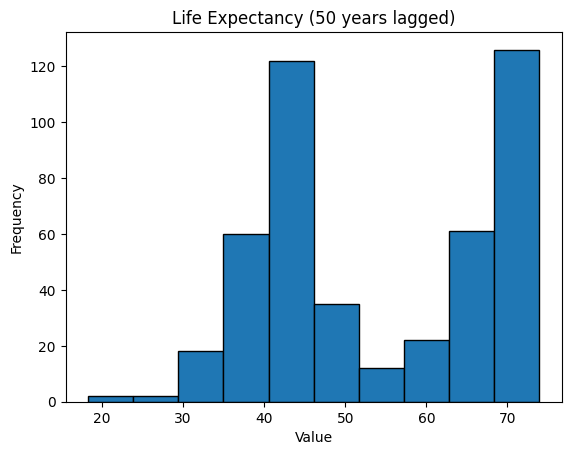

In [15]:
import matplotlib.pyplot as plt

#creating histograms for the data appendix
plt.hist(data, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Life Expectancy (50 years lagged)')

# Show plot
plt.show()